In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [91]:
df = pd.read_csv('Training_set.csv', ';')

<ipython-input-91-bfd480ac5288>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('Training_set.csv', ';')


In [92]:
df

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68
...,...,...,...,...,...
6405,23.39,61.87,1010.35,48.91,444.03
6406,11.63,40.55,1022.89,87.12,474.67
6407,27.79,69.23,1012.86,45.71,435.06
6408,12.26,41.50,1014.87,89.41,471.13


Функция для определения числа пропущенных значений по столбцам

In [93]:
def missings(df):
  df_miss = pd.DataFrame()
  df_miss['Not miss'] = df.notna().sum()
  df_miss['Miss'] = df.isna().sum()
  return df_miss
missings(df)

,Not miss,Miss
AT,6410,0
EV,6410,0
AP,6410,0
RH,6410,0
PE,6410,0


Проверка на дубликаты

In [94]:
def print_dups(df):
  count = df.duplicated().sum()
  print(f'Duplicates: {count}')

print_dups(df)

Duplicates: 14


In [95]:
df.drop_duplicates(inplace = True)
print_dups(df)
df.reset_index(drop = True, inplace = True) #Обновление индексов

Duplicates: 0


Проверка на выбросы

In [96]:
def print_outl(df, feature):
  lowest = df.sort_values([feature])[feature][:5]
  highest = df.sort_values([feature])[feature][-5:]
  print(f'The lowest values of {feature} feature: ')
  print(lowest)
  print(f'The highest values of {feature} feature: ')
  print(highest)
  print()

for column_name in df.columns:
  print_outl(df, column_name)

The lowest values of AT feature: 
5453    1.81
3937    2.58
2972    2.71
5394    3.00
3577    3.20
Name: AT, dtype: float64
The highest values of AT feature: 
5649    35.01
1340    35.03
5302    35.10
3113    35.20
4915    35.56
Name: AT, dtype: float64

The lowest values of EV feature: 
6304    25.36
1291    25.36
5454    25.88
3931    25.88
2390    25.88
Name: EV, dtype: float64
The highest values of EV feature: 
640     80.18
2119    80.18
2611    80.18
3750    80.25
3150    81.56
Name: EV, dtype: float64

The lowest values of AP feature: 
2938    992.89
2020    994.60
5013    995.02
3509    995.24
1375    995.45
Name: AP, dtype: float64
The highest values of AP feature: 
2483    1033.09
1040    1033.14
4521    1033.19
6327    1033.29
4892    1033.30
Name: AP, dtype: float64

The lowest values of RH feature: 
5649    26.03
1778    28.81
4141    29.43
3165    29.86
729     30.34
Name: RH, dtype: float64
The highest values of RH feature: 
2192    100.13
2008    100.13
4029    100.14
5

Проверка на мультиколлинеарность (линейная)

In [97]:
corr_table = df.corr().style.background_gradient(cmap = 'viridis')
corr_table

,AT,EV,AP,RH,PE
AT,1.000000,0.842568,-0.507337,-0.547594,-0.948339
EV,0.842568,1.000000,-0.414477,-0.310592,-0.869230
AP,-0.507337,-0.414477,1.000000,0.110840,0.514741
RH,-0.547594,-0.310592,0.110840,1.000000,0.393883
PE,-0.948339,-0.869230,0.514741,0.393883,1.000000


Можно заметить, что температура окружающего воздуха значительно коррелирует с выходной тягой. Имеет смысл проверить как повлияет удаление одного из собцов на результат обучения

In [98]:
def del_feature(df, feature):
  return df.drop(feature, axis=1)


Все данные из дата сета являются числовыми


In [99]:
df.describe()

,AT,EV,AP,RH,PE
count,6396.000000,6396.000000,6396.000000,6396.000000,6396.000000
mean,19.655775,54.289472,1013.218404,73.318205,454.350688
std,7.428144,12.675436,5.933810,14.684955,17.040970
min,1.810000,25.360000,992.890000,26.030000,420.260000
25%,13.580000,41.760000,1009.060000,63.340000,439.830000
50%,20.420000,52.065000,1012.945000,74.955000,451.440000
75%,25.720000,66.517500,1017.220000,84.902500,468.240000
max,35.560000,81.560000,1033.300000,100.160000,495.760000


**Описание данных**

Гистограммы

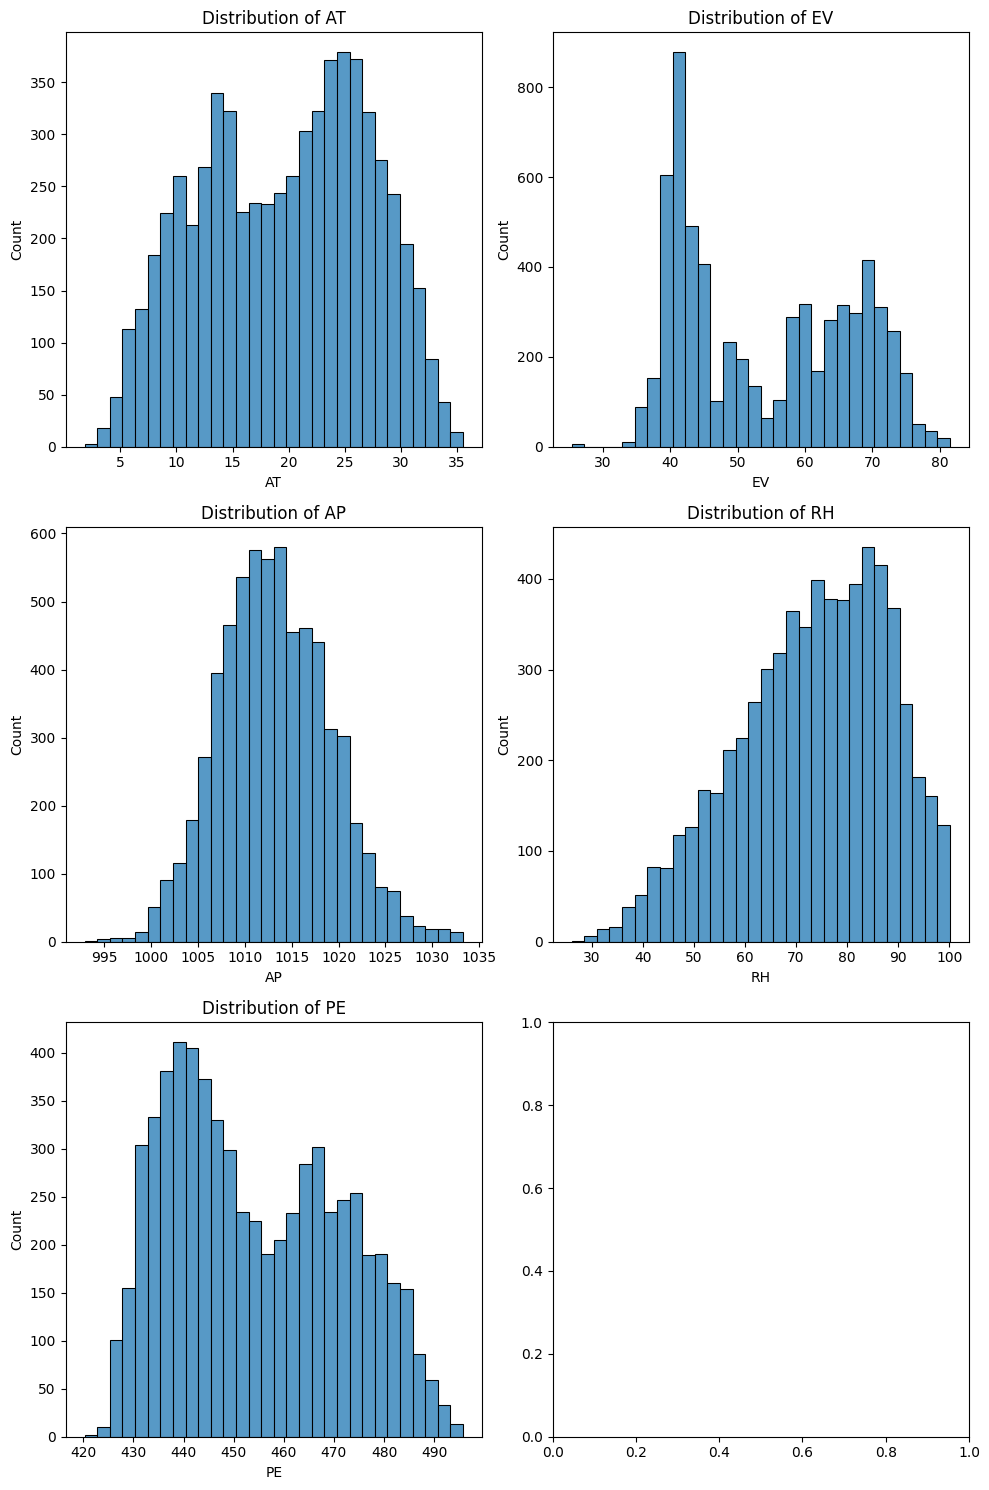

In [100]:
def plot_hists(df):
  numeric_features = df.columns

  num_plots = len(numeric_features)
  num_cols = 2
  num_rows = (num_plots // num_cols) + (num_plots % num_cols)

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))

  # Разворачиваем двумерный массив осей в одномерный для удобства индексации
  axes = axes.ravel()

  for i, column in enumerate(numeric_features):
    sns.histplot(df[column], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

  plt.tight_layout()
  plt.show()
plot_hists(df)

Ящики с усами

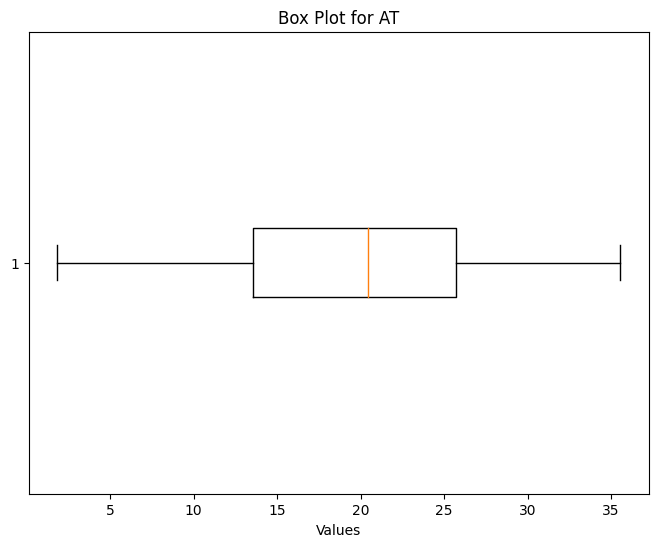

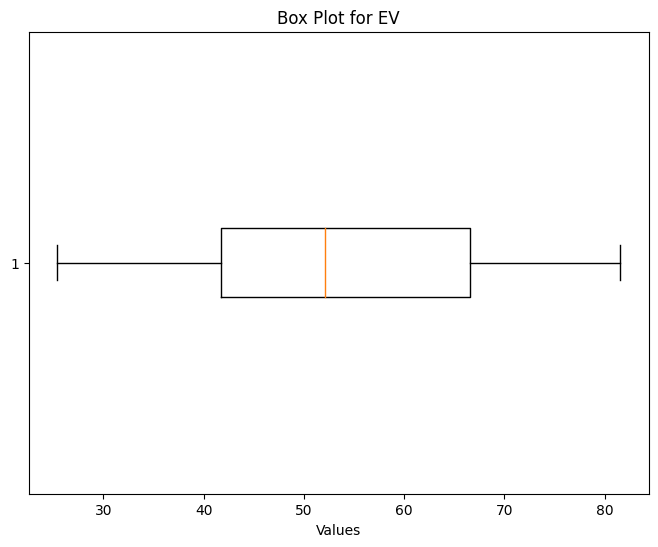

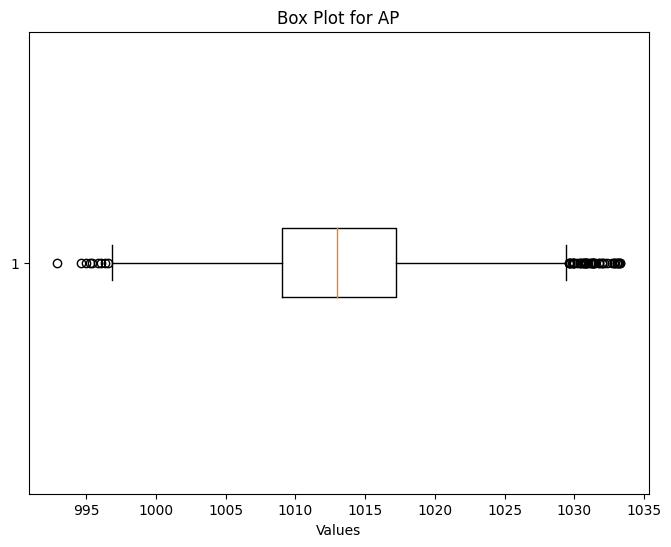

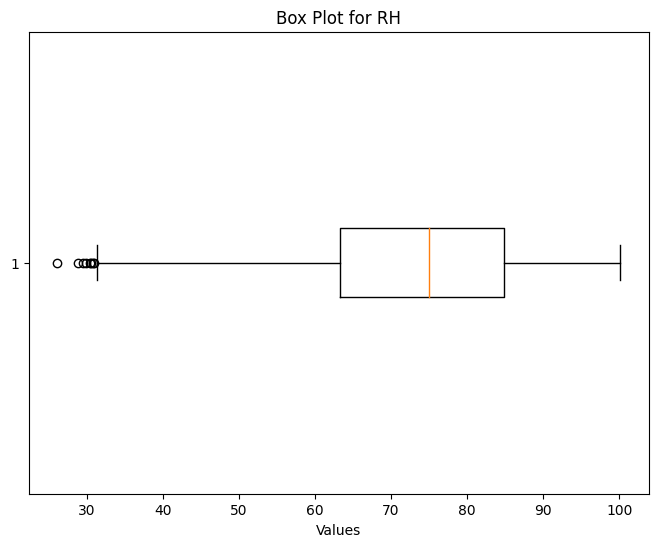

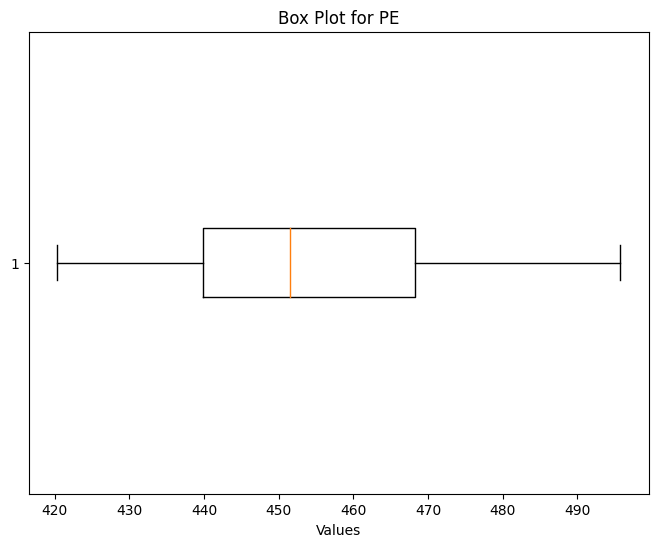

In [101]:
def plot_box(df):

    numeric_columns = df.columns

    # Строим ящики с усами для каждого числового атрибута
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[column], vert=False)
        plt.title(f'Box Plot for {column}')
        plt.xlabel('Values')
        plt.show()
plot_box(df)

Диаграммы зависимостей

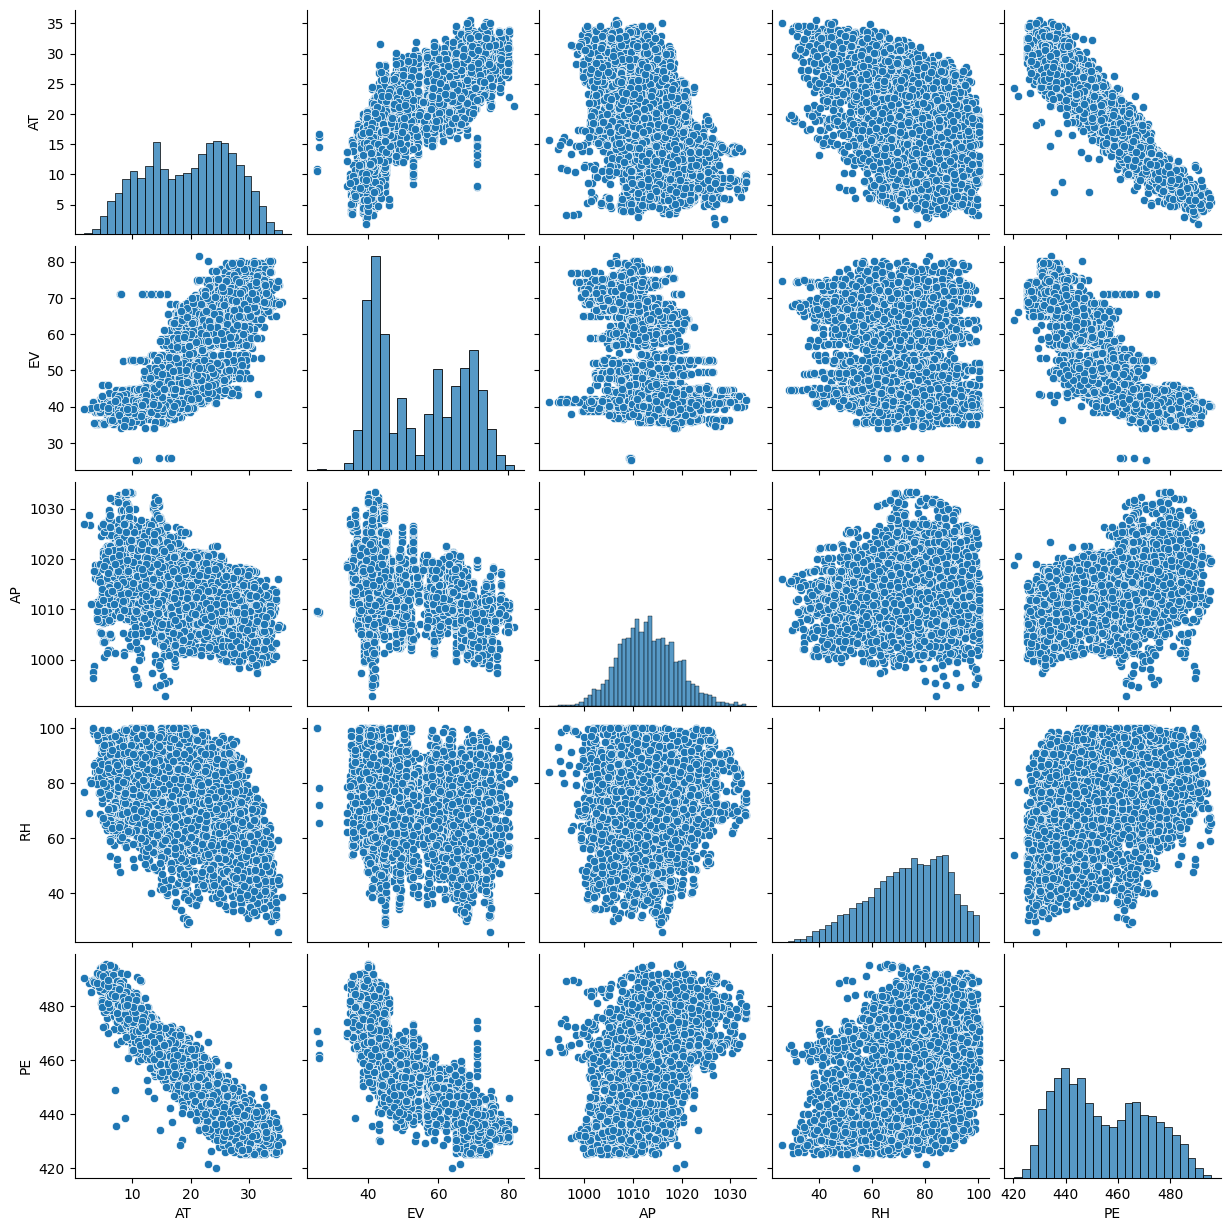

In [102]:
def plot_pairs(df):
  sns.pairplot(df)
  plt.show()
plot_pairs(df)

Создание тестового дата сета


In [103]:
def get_train_test_dfs(df, target_col):
  X = df.drop(columns=[target_col])
  Y = df[target_col]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  return X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = get_train_test_dfs(df, 'PE')
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')


X_train shape: (5116, 4)
X_test shape: (1280, 4)
Y_train shape: (5116,)
Y_test shape: (1280,)


Обучение модели линейной регрессии

In [104]:
def linear_regression(X_train, y_train, X_test, Y_test):
    # Инициализация модели
    model = LinearRegression()

    # Обучение модели
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    print(f'MAE linear regression: {mean_absolute_error(Y_test, Y_pred)}') #Средняя абсолютная ошибка
    print(f'MSE linear regression: {mean_squared_error(Y_test, Y_pred)}') #Средняя квадратичная ошибка
    print(f'R2 Score linear regression: {r2_score(Y_test, Y_pred)}') #R2 метрика


Оценка обучения

In [105]:
linear_regression(X_train, Y_train, X_test, Y_test)

MAE linear regression: 3.5251547368051406
MSE linear regression: 18.56244279646828
R2 Score linear regression: 0.9380672453042824


Можно заметить, что линейная регрессия отлично подходит для данной задачи


Удалим один из коррелирующих столбцов и повторим обучение модели


In [106]:
df_2 = del_feature(df, 'EV')
X_train2, X_test2, Y_train2, Y_test2 = get_train_test_dfs(df_2, 'PE')

In [107]:
linear_regression(X_train2, Y_train2, X_test2, Y_test2)

MAE linear regression: 3.6773474685877794
MSE linear regression: 20.371707649865208
R2 Score linear regression: 0.9320307145753455


Удаление одного из коррелирующих атрибутов привело к незначительному снижению точности предсказания

Применение Lasso регрессии

In [108]:
def lasso_regression(X_train, Y_train, X_test, Y_test):
  model_LASSO = Lasso(alpha = 1)
  model_LASSO.fit(X_train, Y_train)
  coeffs = pd.Series(model_LASSO.coef_, index=X_train.columns)
  insignificant_features = list(coeffs[abs(coeffs) < 0.1].index)
  print('Insignificant features: ', insignificant_features)
  Y_predL = model_LASSO.predict(X_test)
  print(f'MAE lasso: {mean_absolute_error(Y_test, Y_predL)}') #Средняя абсолютная ошибка
  print(f'MSE lasso: {mean_squared_error(Y_test, Y_predL)}') #Средняя квадратичная ошибка
  print(f'R2 Score lasso: {r2_score(Y_test, Y_predL)}') #R2 метрика

In [109]:
lasso_regression(X_train, Y_train, X_test, Y_test)

Insignificant features:  ['AP']
MAE lasso: 3.5443591631330422
MSE lasso: 18.723999755436783
R2 Score lasso: 0.937528217784096


Можно заметить, что после LASSO регрессии точность практически осталась той же, но также был выявлен атрибут незначительно влияющий на результат обучения ('AP')

Удалим атрибут 'AP'

In [110]:
df_3 = del_feature(df, 'AP')
X_train3, X_test3, Y_train3, Y_test3 = get_train_test_dfs(df_3, 'PE')

In [111]:
lasso_regression(X_train3, Y_train3, X_test3, Y_test3)

Insignificant features:  []
MAE lasso: 3.5442748972351623
MSE lasso: 18.758861972352292
R2 Score lasso: 0.9374119015668798


In [112]:
linear_regression(X_train3, Y_train3, X_test3, Y_test3)

MAE linear regression: 3.5239842247621964
MSE linear regression: 18.590286710289753
R2 Score linear regression: 0.9379743453393704


**Используем модель регрессии случайного леса**

In [114]:
def random_forest_regression(X_train, Y_train, X_test, Y_test):
  model_RF = RandomForestRegressor(n_estimators=100)
  model_RF.fit(X_train, Y_train)
  Y_predRF = model_RF.predict(X_test)
  print(f'MAE: {mean_absolute_error(Y_test, Y_predRF)}') #Средняя абсолютная ошибка
  print(f'MSE: {mean_squared_error(Y_test, Y_predRF)}') #Средняя квадратичная ошибка
  print(f'R2 Score: {r2_score(Y_test, Y_predRF)}') #R2 метрика

С атрибутом AP

In [115]:
random_forest_regression(X_train, Y_train, X_test, Y_test)

MAE: 2.5893269531249956
MSE: 12.075967178085945
R2 Score: 0.9597090791791568


Без атрибута AP

In [116]:
random_forest_regression(X_train3, Y_train3, X_test3, Y_test3)

MAE: 2.8045535937500015
MSE: 14.041942692828133
R2 Score: 0.9531496903838697
